In [ ]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import df_utils
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd

In [ ]:
x_train = combine_dataframes([x.df.drop([' TimeStamp (s)', 'Pose'],axis=1) for x in knn_train])
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 

x_train_numpy = x_train.values
x_test_numpy = x_test.values
y_train_numpy = y_train.values
y_test_numpy = y_test.values
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#n_estimators_lst = [i for i in range(1, 200)]
#parameters = {'n_estimators':n_estimators_lst} 
#rfc = RandomForestClassifier(random_state=69)
#clf = GridSearchCV(rfc, parameters, n_jobs=-1)
#clf.fit(x_train, y_train)

pipe = make_pipeline(RandomForestClassifier(n_estimators=105, random_state=69))
pipe.fit(x_train,y_train)
predictions = pipe.predict(x_test)

"""
accuracy_arr = []
for i in range(100,200):
    pipe = make_pipeline(RandomForestClassifier(n_estimators=105, random_state=69))
    pipe.fit(x_train,y_train)
    predictions = pipe.predict(x_test)

    number_of_corrects = 0
    for num in range(len(predictions)):
        if(predictions[num] == y_test.iloc[num]):
            number_of_corrects += 1

    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects / len(predictions) * 100))
    accuracy_arr.append((number_of_corrects / len(predictions) * 100))

print("Argmax: ",np.argmax(accuracy_arr))
"""

#pipe = make_pipeline(KNeighborsClassifier(n_neighbors=100))
#pipe.fit(x_train, y_train)
#predictions = pipe.predict(x_test)

#rfc.fit(x_train,y_train)
#predictions = clf.predict(x_test)

#mlp = MLPClassifier(activation='relu', random_state=69)
#mlp.fit(x_train,y_train)


<AxesSubplot:xlabel='x', ylabel='y'>

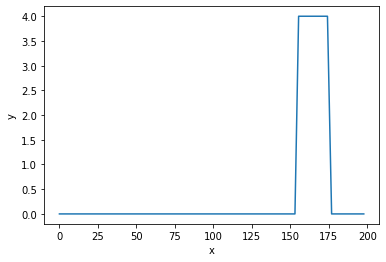

In [ ]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

[[ 921    0    0    0    0    0    0    0    0]
 [1035    0    0    0    0    0    0    0    0]
 [1049    0    0    0    0    0    0    0    0]
 [ 993    0    0    0    0    0    0    0    0]
 [   0    0    0    0  941    0    0    0    0]
 [1004    0    0    0    1    3    0    3    0]
 [  48    0    0    0    0    0    0  999    0]
 [1042    0    0    0    0    0    0   25    0]
 [   0    0    0    0    0    0    0  973    0]]
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       921
           1       1.00      0.00      0.00      1035
           2       1.00      0.00      0.00      1049
           3       1.00      0.00      0.00       993
           4       1.00      1.00      1.00       941
           5       1.00      0.00      0.01      1011
           6       1.00      0.00      0.00      1047
           7       0.01      0.02      0.02      1067
           8       1.00      0.00      0.00       973

    accuracy             

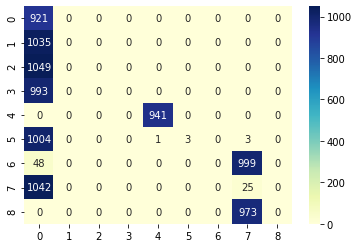

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

sns.heatmap(confusion_matrix(y_test, predictions),
            cmap="YlGnBu", annot=True, fmt="d")

number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects / len(predictions) * 100))

In [ ]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1


print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 1863
number of guesses: 9037
% correct: 20.615248423149275


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>